**In this notebook I will be examining and cleaning the Lending Club loan data.**

The data came from Kaggle: https://www.kaggle.com/wendykan/lending-club-loan-data 

In [8]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import re
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  Normalizer, normalize
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
pd.set_option("display.max_columns",80)
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
import numpy as np
pd.set_option('max_colwidth', 1000)


In [2]:
loans = pd.read_csv("loan.csv")

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.



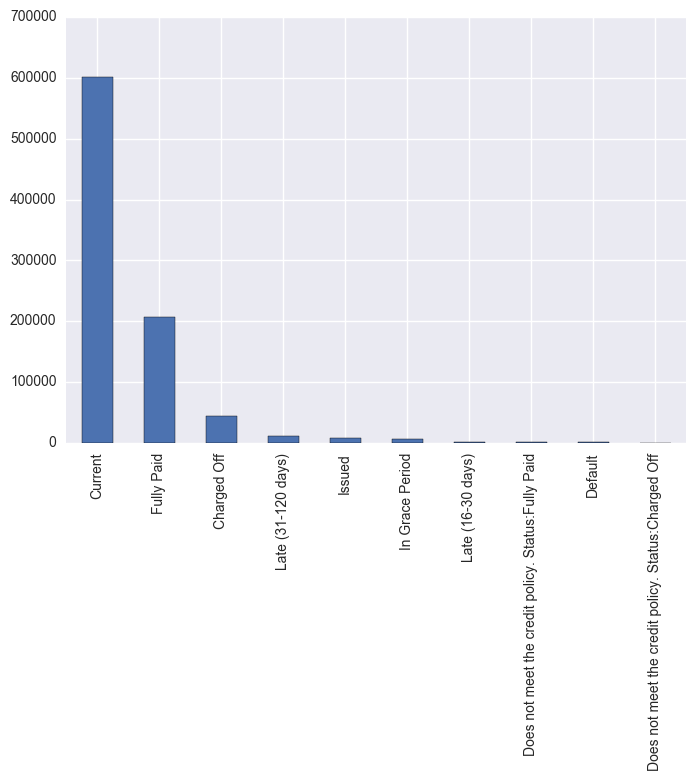

In [4]:
loans["loan_status"].value_counts().plot(kind="bar")

In [5]:
loans["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Most loans are current, which we can't really predict anything with.

In [6]:
loans[loans["loan_status"] == "Fully Paid"].head(15)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1070078,1305201,6500.0,6500.0,6500.000000,60 months,14.65,153.45,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1069908,1305008,12000.0,12000.0,12000.000000,36 months,12.69,402.54,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1069866,1304956,3000.0,3000.0,3000.000000,36 months,9.91,96.68,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1069759,1304871,1000.0,1000.0,1000.000000,36 months,16.29,35.31,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1065775,1299699,10000.0,10000.0,10000.000000,36 months,15.27,347.98,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a lot of columns and it looks like a lot of them are just NaNs. Lending Club increased the amount of metrics they used in 2014-2015, and most of these loans are from before that.

I am only going to look at loans that were fully paid or charged off as labels like "default" do have a small chance of being paid off.

In [3]:
loans2 = loans[(loans.loan_status == "Fully Paid") | (loans.loan_status == "Charged Off")]

Let's look at some of the columns:

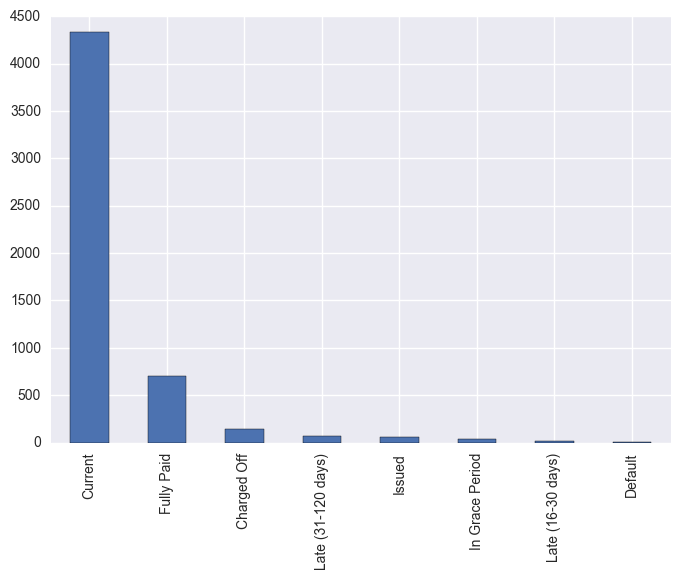

In [10]:
loans[loans.emp_title == "RN"].loan_status.value_counts().plot(kind="bar")

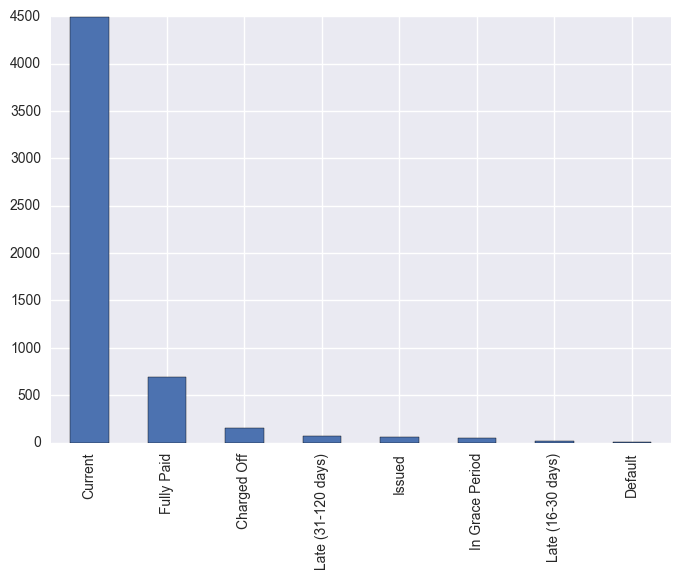

In [11]:
loans[loans.emp_title == "Registered Nurse"].loan_status.value_counts().plot(kind="bar")

Looks like employee title is, at least initially, a custom field--meaning "RN" and "Registered Nurse" are possible values. I am going to omit this column for now, even if it may be helpful, because it would require heavy cleaning.

0.17886635226962774

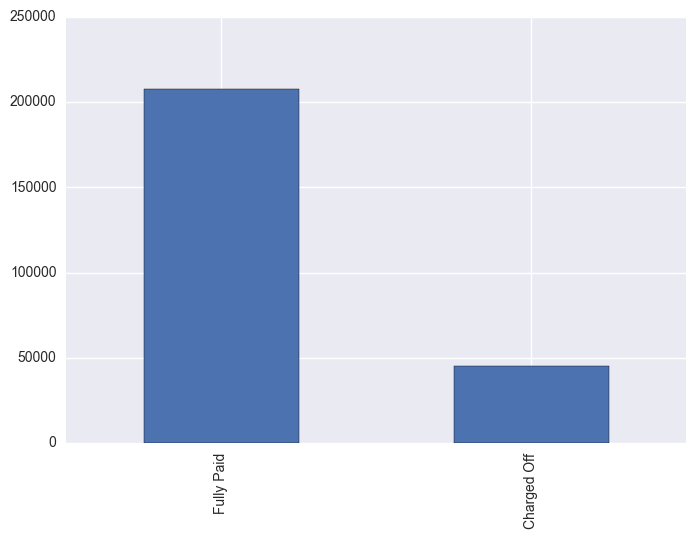

In [15]:
loans2.loan_status.value_counts().plot(kind="bar")
len(loans2[loans2.loan_status=="Charged Off"]) / len(loans2)

Looks like only 18% of loans were not paid off.

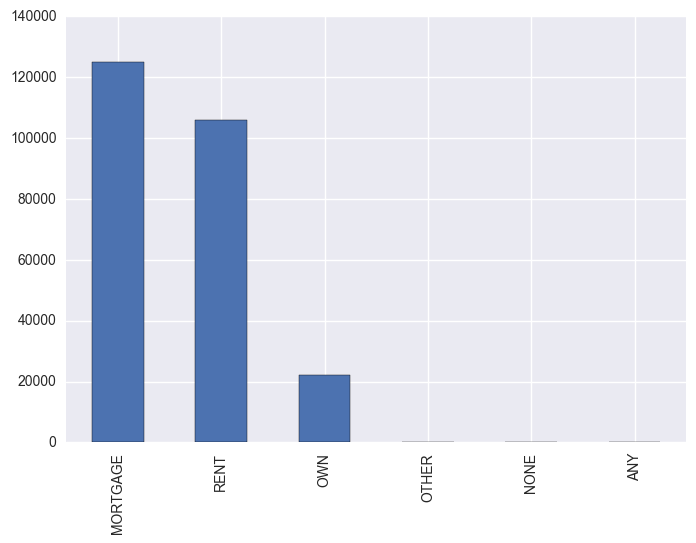

In [17]:
loans2.home_ownership.value_counts().plot(kind="bar")

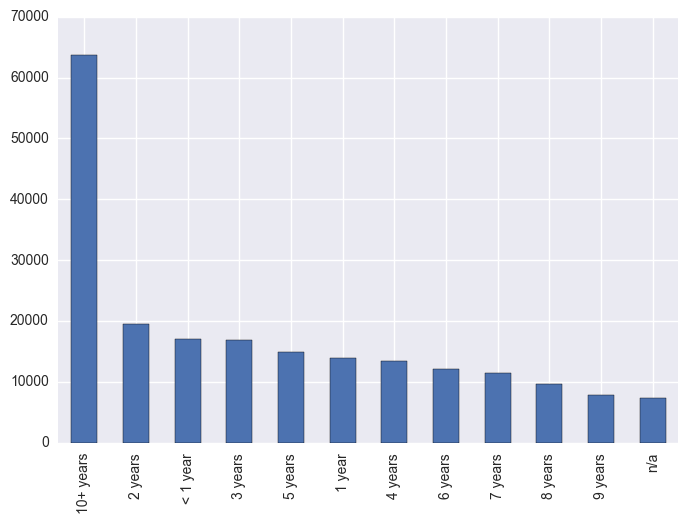

In [18]:
loans2[loans2.loan_status == "Fully Paid"].emp_length.value_counts().plot(kind="bar")


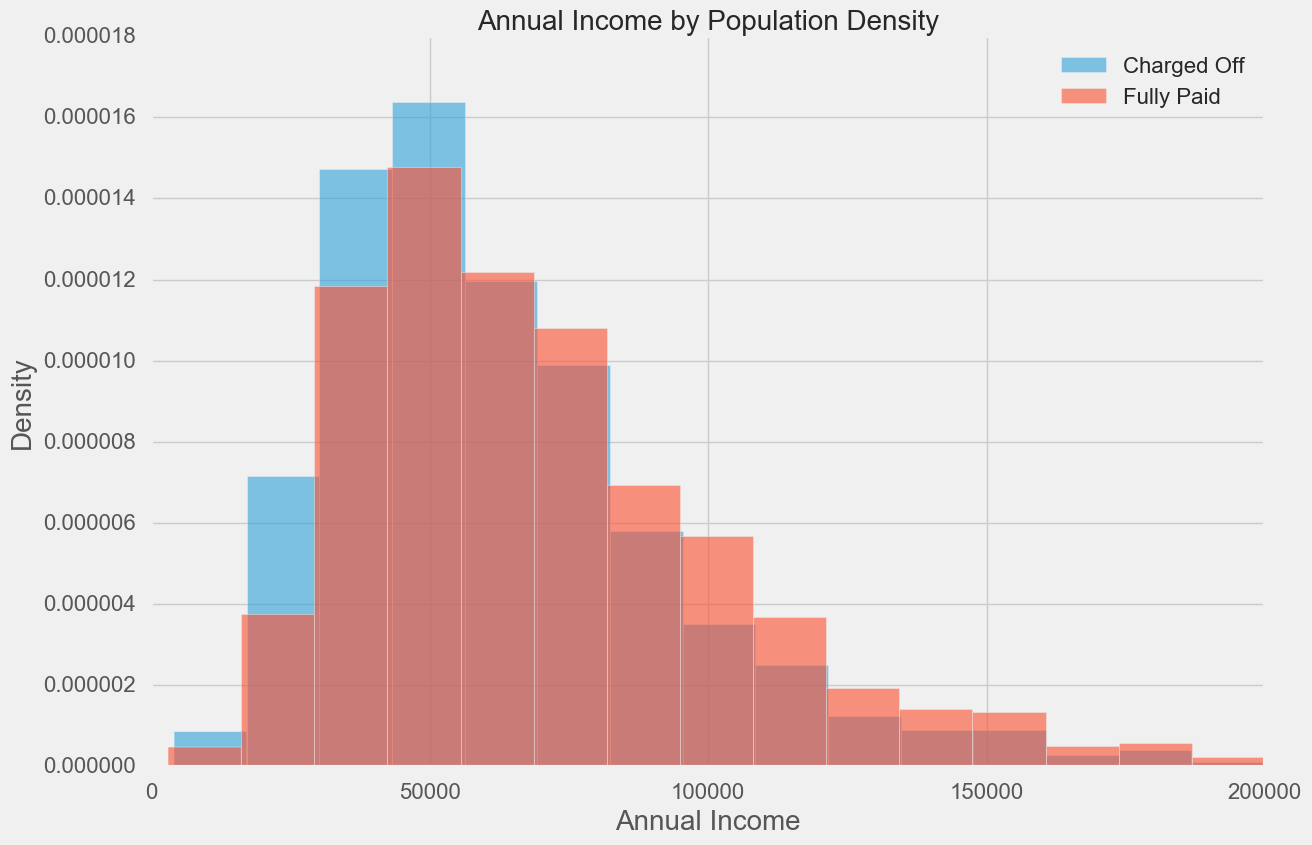

In [127]:
sns.set_context("poster")
plt.style.use("fivethirtyeight")
sns.distplot(loans2[(loans2.annual_inc < 200000) &(loans2.loan_status== "Charged Off")].annual_inc,kde=False, norm_hist=True, bins=15,hist_kws=dict(alpha=.6), label="Charged Off")
sns.distplot(loans2[(loans2.annual_inc < 200000) & (loans2.loan_status== "Fully Paid")].annual_inc, kde=False,norm_hist=True, bins=15,hist_kws=dict(alpha=.6), label="Fully Paid")
plt.legend()
plt.xlabel("Annual Income", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.title("Annual Income by Population Density", fontsize=20)
plt.savefig("annualincome")





Those who paid off their loans tend to have a higher income than those who did not.

In [93]:
loans2_group = loans2.groupby(["grade", "loan_status"]).agg("count").reset_index()
loans2_group = loans2_group.loc[[1,0,3,2,5,4,7,6,9,8,11,10,13,12]]
loans2_group.head(15)

,grade,loan_status,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,if_desc,len_of_cred_hist
1,A,Fully Paid,39679,39679,39679,39679,39679,39679,39679,39679,...,20,20,20,20,24235,20,20,20,39679,39679
0,A,Charged Off,2617,2617,2617,2617,2617,2617,2617,2617,...,0,0,0,0,1519,0,0,0,2617,2617
3,B,Fully Paid,66546,66546,66546,66546,66546,66546,66546,66546,...,34,34,34,34,48834,34,34,34,66546,66546
2,B,Charged Off,9519,9519,9519,9519,9519,9519,9519,9519,...,0,0,0,0,6814,0,0,0,9519,9519
5,C,Fully Paid,52678,52678,52678,52678,52678,52678,52678,52678,...,42,42,42,42,42038,42,42,42,52678,52678
4,C,Charged Off,12642,12642,12642,12642,12642,12642,12642,12642,...,0,0,0,0,10223,0,0,0,12642,12642
7,D,Fully Paid,30020,30020,30020,30020,30020,30020,30020,30020,...,26,26,26,26,23817,26,26,26,30020,30020
6,D,Charged Off,10486,10486,10486,10486,10486,10486,10486,10486,...,0,0,0,0,8553,0,0,0,10486,10486
9,E,Fully Paid,12928,12928,12928,12928,12928,12928,12928,12928,...,18,18,18,18,10337,18,18,18,12928,12928
8,E,Charged Off,6258,6258,6258,6258,6258,6258,6258,6258,...,0,0,0,0,5082,0,0,0,6258,6258


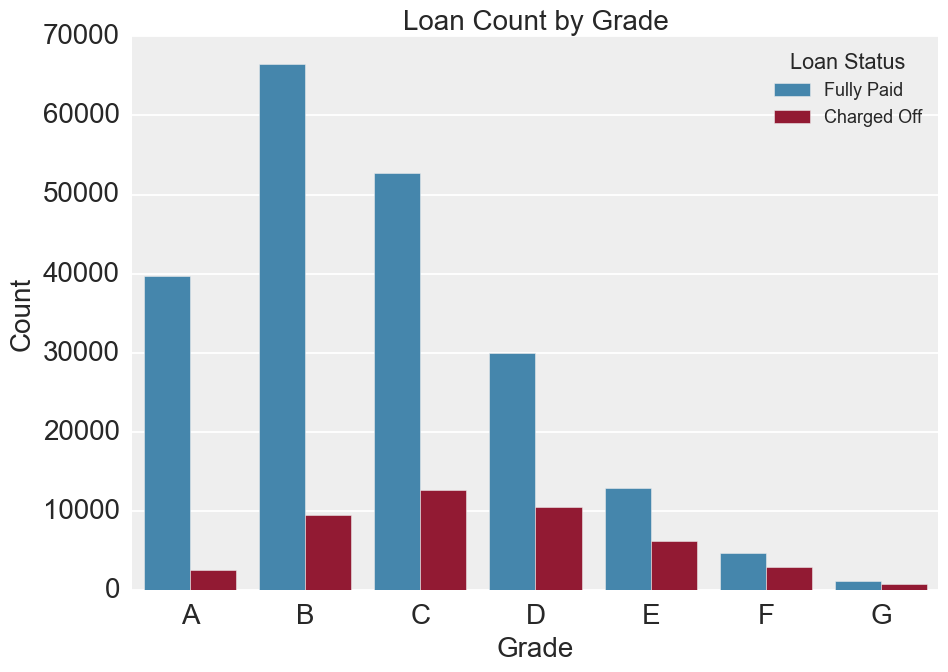

In [105]:
plt.style.use('bmh')
sns.set_context("talk")
sns.barplot(x = loans2_group.grade, y = loans2_group.id, hue=loans2_group.loan_status)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Grade", fontsize=20 )
plt.ylabel("Count", fontsize=20)
plt.legend(title="Loan Status")
plt.title("Loan Count by Grade", fontsize=20)



Looks like lending club's grade system, which grades loans based off risk works pretty well. A and B loans are substantially less risk than D or E loans.

Now let's do some cleaning. First I looked at all of the 70 columns or so and ended up with about 20 that had: minimal or no NaNs, seems like they would affect whether someone would pay of their loan or not, and were not too similar to other columns.

In [13]:
#first two are for classification
feature_columns = [ "id", "loan_amnt", "term", "int_rate","emp_length", "home_ownership", "annual_inc",
                   "verification_status", "addr_state", "delinq_2yrs", "inq_last_6mths", "open_acc", "dti",
                  "total_acc", "collections_12_mths_ex_med", "mths_since_last_major_derog", "verification_status",
                 "purpose", "revol_util", "if_desc", "revol_bal", "pub_rec", "grade" ]
# questionable = ["grade", "int_rate",]
# maybe = ["installment", "sub_grade", "issue_d", "purpose (will need to modify)", "zip_code", "mths_since_last_delinq"
#         "tot_coll_amt" ]
# modify_feature = ["empl title", "desc", "earliest_cr_line", "title"]
# research = ["total_rev_hi_lim", "total_cur_bal", "acc_now_delinq", "installment", "subgrade", "dti", "pub_rec", "last_pymnt_amnt(look if they paid early)"]
# target= "loan status"
# employer title replaces employee name after "9/23/2013"

There are a lot of NaNs for major derogatories or having a collection designation on the credit report in the last 12 months. However, this column seems important, and having either of these looks pretty rare, so I am going to assume NaNs actually mean 0.

In [4]:
loans2.mths_since_last_major_derog = loans2.mths_since_last_major_derog.fillna(0)
loans2.collections_12_mths_ex_med = loans2.collections_12_mths_ex_med.fillna(0).astype(int)


//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [5]:
loans2.term.head()

0     36 months
1     60 months
2     36 months
3     36 months
5     36 months
Name: term, dtype: object

In [ ]:
#the term column is a string, so lets extract just the number of months
loans2.term = loans2.term.apply(lambda x: x.split(" ")[1])
loans2.term = loans2.term.astype(int)

In [9]:
loans.desc.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>
1      Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possibl

In [10]:
#For now, let's just make a feature that signifies whether the person asking for a loan has a description or not. 
#It is not a required field.
def if_desc(row):
    if type(row)== str:
        return 1
    else:
        return 0
loans2["if_desc"] = loans2.desc.apply(if_desc)
loans2["if_desc"].value_counts()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



0    164651
1     88320
Name: if_desc, dtype: int64

The issued date and the  earliest credit line are both not in datetime format. I am going to convert those and then subtract earliest credit line from issued date to create a column for length of credit history.

In [11]:
loans2["issue_d"] = pd.to_datetime(loans2["issue_d"], format="%b-%Y")
loans2["earliest_cr_line"] = pd.to_datetime(loans2["earliest_cr_line"], format="%b-%Y")
loans2["len_of_cred_hist"] = (loans2.issue_d - loans2.earliest_cr_line).dt.days

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [14]:
#filtering out columns and such so I don't need to work with the whole dataset and getting rid of columns that will
#be replaced with dummy variables
loans3_features = loans2[feature_columns]
loans3_features["if_desc"] = loans2["if_desc"]
loans3_target = loans2["loan_status"]
loans3_features["len_of_cred_hist"] = loans2["len_of_cred_hist"]
loans4_features = loans3_features.select_dtypes(exclude=["object"])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [26]:
loans3_features["if_desc"].value_counts(dropna=False)

0    164651
1     88320
Name: if_desc, dtype: int64

In [14]:
loans4_features.columns

Index(['id', 'loan_amnt', 'int_rate', 'annual_inc', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'dti', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'revol_util', 'if_desc', 'revol_bal', 'pub_rec', 'len_of_cred_hist'],
      dtype='object')

In [9]:
loans4_features = loans4_features.drop(["id"], axis=1)
loans4_features = loans4_features.drop(["mths_since_last_major_derog","collections_12_mths_ex_med"], axis=1)
loans4_features.head()

,loan_amnt,term,int_rate,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,dti,total_acc,revol_util,if_desc,revol_bal,pub_rec,len_of_cred_hist
0,5000.0,36,10.65,24000.0,0.0,1.0,3.0,27.65,9.0,83.7,1,13648.0,0.0,9830
1,2500.0,60,15.27,30000.0,0.0,5.0,3.0,1.00,4.0,9.4,1,1687.0,0.0,4627
2,2400.0,36,15.96,12252.0,0.0,2.0,2.0,8.72,10.0,98.5,0,2956.0,0.0,3682
3,10000.0,36,13.49,49200.0,0.0,1.0,10.0,20.00,37.0,21.0,1,5598.0,0.0,5782
5,5000.0,36,7.90,36000.0,0.0,3.0,9.0,11.20,12.0,28.3,0,7963.0,0.0,2586


In [126]:
loans2.purpose.value_counts()

debt_consolidation    148363
credit_card            50076
home_improvement       14929
other                  14277
major_purchase          6265
small_business          4746
car                     3646
medical                 2854
moving                  2028
wedding                 1955
house                   1652
vacation                1588
educational              325
renewable_energy         267
Name: purpose, dtype: int64

Purposes appears to be a fixed category as well as length of term, state, grade, ownership (rent, own, etc. home),
employment_length (1-9 years and 10+), and verification status (whether Lending Club was able to verify income info,
                                                               and other employment information). I am going to create dummy variables for all of these so that machine learning algorithms can use these columns.

In [18]:
purpose_dummies = pd.get_dummies(loans2.purpose)
term_dummies = pd.get_dummies(loans2.term)
state_dummies = pd.get_dummies(loans2.addr_state)
grade_dummies = pd.get_dummies(loans2.grade)
ownership_dummies = pd.get_dummies(loans2.home_ownership)
employment_dummies = pd.get_dummies(loans2.emp_length)
ver_status = pd.get_dummies(loans2.verification_status)

In [21]:
#dropping the id column as that does not signify anything meaningful about the loan
#dropping some columns still the dataframe that I made dummy variables for
loans4_features = loans4_features.drop(["id"], axis=1)
loans4_features = loans4_features.drop(["mths_since_last_major_derog","collections_12_mths_ex_med"], axis=1)
loans4_features.head()

,loan_amnt,int_rate,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,dti,total_acc,revol_util,if_desc,revol_bal,pub_rec,len_of_cred_hist
0,5000.0,10.65,24000.0,0.0,1.0,3.0,27.65,9.0,83.7,1,13648.0,0.0,9830
1,2500.0,15.27,30000.0,0.0,5.0,3.0,1.00,4.0,9.4,1,1687.0,0.0,4627
2,2400.0,15.96,12252.0,0.0,2.0,2.0,8.72,10.0,98.5,0,2956.0,0.0,3682
3,10000.0,13.49,49200.0,0.0,1.0,10.0,20.00,37.0,21.0,1,5598.0,0.0,5782
5,5000.0,7.90,36000.0,0.0,3.0,9.0,11.20,12.0,28.3,0,7963.0,0.0,2586


In [22]:
#Adding the dummy variables to the dataframe
loans5_features = loans4_features.join([purpose_dummies, state_dummies, term_dummies, grade_dummies, employment_dummies, ownership_dummies, ver_status])

In [23]:
#rev util has a few nulls so I will fill them with mean of that column

loans5_features["revol_util"] = loans5_features.revol_util.fillna(loans5_features.revol_util.mean())

In [24]:
loans5_features.head()

,loan_amnt,int_rate,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,dti,total_acc,revol_util,if_desc,revol_bal,pub_rec,len_of_cred_hist,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,36 months,60 months,A,B,C,D,E,F,G,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,n/a,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified
0,5000.0,10.65,24000.0,0.0,1.0,3.0,27.65,9.0,83.7,1,13648.0,0.0,9830,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2500.0,15.27,30000.0,0.0,5.0,3.0,1.00,4.0,9.4,1,1687.0,0.0,4627,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,2400.0,15.96,12252.0,0.0,2.0,2.0,8.72,10.0,98.5,0,2956.0,0.0,3682,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,10000.0,13.49,49200.0,0.0,1.0,10.0,20.00,37.0,21.0,1,5598.0,0.0,5782,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5,5000.0,7.90,36000.0,0.0,3.0,9.0,11.20,12.0,28.3,0,7963.0,0.0,2586,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


Everything Looks Good!

In [26]:
loans5_features.to_pickle("loans_features.pkl")
loans3_target.to_pickle("loans_target.pkl")